In [21]:
# Some utils to read images

import io
from PIL import Image

In [22]:
import textgrad as tg
from textgrad import get_engine
from textgrad.autograd import MultimodalLLMCall
from textgrad.loss import ImageQALoss

In [23]:
import os

# Assuming the OpenAI API key is stored in an environment variable named 'OPENAI_API_KEY'
openai_api_key = os.getenv('OPENAI_API_KEY')
assert openai_api_key is not None and len(openai_api_key) > 0, "Please set the OPENAI_API_KEY environment variable"

In [24]:
tg.set_backward_engine("gpt-4o", override=True)

# Simply answering questions about images

In [25]:
# import httpx

# image_url = "https://upload.wikimedia.org/wikipedia/commons/a/a7/Camponotus_flavomarginatus_ant.jpg"
# image_data = httpx.get(image_url).content

# Import necessary library
import httpx

# Path to the local image
image_path = ".assets/176.png"

# Read the local image file in binary mode
with open(image_path, 'rb') as file:
    image_data = file.read()

# Print the first few bytes of the image data to verify (optional)
print(image_data[:10])

b'\x89PNG\r\n\x1a\n\x00\x00'


In [26]:
image_variable = tg.Variable(image_data, role_description="image to answer a question about", requires_grad=False)

# MathVista-176, ground truth = (D) 2
question_text = """
Hint: Please answer the question and provide the correct option letter, e.g., A, B, C, D, at the end. 
Question: Find $RS$ if $\triangle QRS$ is an equilateral triangle. 
Choices: (A) 0.5 (B) 1 (C) 1.5 (D) 2
"""
question_text = question_text.strip()
question_text

'Hint: Please answer the question and provide the correct option letter, e.g., A, B, C, D, at the end. \nQuestion: Find $RS$ if $\triangle QRS$ is an equilateral triangle. \nChoices: (A) 0.5 (B) 1 (C) 1.5 (D) 2'

In [27]:
question_variable = tg.Variable(question_text, role_description="question", requires_grad=False)
question_variable

Variable(value=Hint: Please answer the question and provide the correct option letter, e.g., A, B, C, D, at the end. 
Question: Find $RS$ if $	riangle QRS$ is an equilateral triangle. 
Choices: (A) 0.5 (B) 1 (C) 1.5 (D) 2, role=question, grads=set())

In [28]:
response = MultimodalLLMCall("gpt-4o")([image_variable, question_variable])
response

Variable(value=Since \( \triangle QRS \) is an equilateral triangle, all sides are equal. Therefore, we can set up the following equations based on the given side lengths:

\[ 4x = 6x - 1 \]
\[ 4x = 2x + 1 \]

First, solve the equation \( 4x = 6x - 1 \):

\[ 4x = 6x - 1 \]
\[ 4x - 6x = -1 \]
\[ -2x = -1 \]
\[ x = \frac{1}{2} \]

Next, solve the equation \( 4x = 2x + 1 \):

\[ 4x = 2x + 1 \]
\[ 4x - 2x = 1 \]
\[ 2x = 1 \]
\[ x = \frac{1}{2} \]

Now that we have \( x = \frac{1}{2} \), we can find the length of \( RS \):

\[ RS = 2x + 1 \]
\[ RS = 2\left(\frac{1}{2}\right) + 1 \]
\[ RS = 1 + 1 \]
\[ RS = 2 \]

Therefore, the length of \( RS \) is 2. The correct option is (D)., role=response from the language model, grads=set())

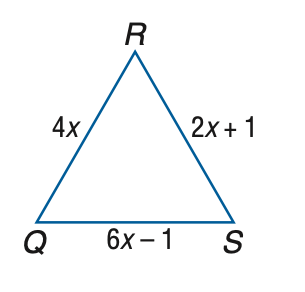

In [29]:
Image.open(io.BytesIO(image_data))

In [30]:
loss_fn = ImageQALoss(
    evaluation_instruction="Does this seem like a complete and good answer for the image? Criticize heavily.",
    # engine="claude-3-5-sonnet-20240620"
    engine="gpt-4o",
)
loss_fn

In [31]:
loss = loss_fn(question=question_variable, image=image_variable, response=response)
loss

Variable(value=The provided answer is mostly correct but can be improved for clarity and completeness. Here is a detailed critique:

1. **Introduction and Setup**:
   - The answer correctly identifies that since \( \triangle QRS \) is an equilateral triangle, all sides are equal.
   - It sets up the correct equations based on the given side lengths: \( 4x = 6x - 1 \) and \( 4x = 2x + 1 \).

2. **Solving the Equations**:
   - The solution to the first equation \( 4x = 6x - 1 \) is correctly shown step-by-step:
     \[
     4x = 6x - 1 \\
     4x - 6x = -1 \\
     -2x = -1 \\
     x = \frac{1}{2}
     \]
   - The solution to the second equation \( 4x = 2x + 1 \) is also correctly shown:
     \[
     4x = 2x + 1 \\
     4x - 2x = 1 \\
     2x = 1 \\
     x = \frac{1}{2}
     \]

3. **Finding \( RS \)**:
   - The calculation for \( RS \) is correctly performed:
     \[
     RS = 2x + 1 \\
     RS = 2\left(\frac{1}{2}\right) + 1 \\
     RS = 1 + 1 \\
     RS = 2
     \]

4. **Conclusion**:


In [32]:
optimizer = tg.TGD(parameters=[response])
optimizer

In [33]:
loss.backward()
optimizer.step()
print(response.value)

Since \( \triangle QRS \) is an equilateral triangle, all sides are equal. Therefore, we can set up the following equations based on the equality of the sides \( QR \), \( QS \), and \( RS \):

\[ 4x = 6x - 1 \]
\[ 4x = 2x + 1 \]

First, solve the equation \( 4x = 6x - 1 \):

\[ 4x = 6x - 1 \]
\[ 4x - 6x = -1 \]
\[ -2x = -1 \]
\[ x = \frac{1}{2} \]

Next, solve the equation \( 4x = 2x + 1 \):

\[ 4x = 2x + 1 \]
\[ 4x - 2x = 1 \]
\[ 2x = 1 \]
\[ x = \frac{1}{2} \]

Both equations give the same value for \( x \), confirming the consistency. Now that we have \( x = \frac{1}{2} \), we can find the length of \( RS \) by substituting \( x \) into the expression for \( RS \):

\[ RS = 2x + 1 \]
\[ RS = 2\left(\frac{1}{2}\right) + 1 \]
\[ RS = 1 + 1 \]
\[ RS = 2 \]

Therefore, the length of \( RS \) is 2. The correct option is (D).
